In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as py

In [133]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    
    axes.plot(x, y, color = color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color = color)
    axes.tick_params('y', colors = color)

<AxesSubplot:xlabel='year', ylabel='price'>

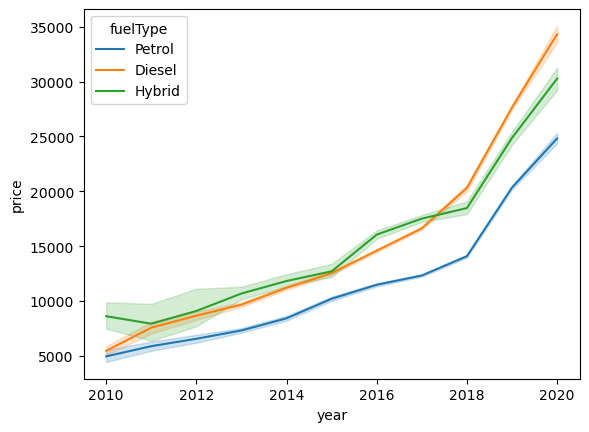

In [27]:
cars_data_csv = pd.read_csv('Useable Cars dataset.csv')
cars_data = pd.DataFrame(cars_data_csv)
cars_data_essential_columns = cars_data[['Make', 'model', 'year', 'price', 'fuelType', 'mpg']]
cars_data_essential_columns.set_index('fuelType')

options = ['Petrol', 'Diesel', 'Hybrid']

cars_filtered = cars_data_essential_columns.loc[cars_data_essential_columns['fuelType'].isin(options)]

cars_filtered.set_index('year')

years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

cars_filtered2 = cars_filtered.loc[cars_filtered['year'].isin(years)]

cars_filtered2.groupby(['fuelType', 'year'])['price'].mean()
                                                                                
sns.lineplot(x = 'year', y = 'price', data = cars_filtered2, hue = 'fuelType')



              


<AxesSubplot:xlabel='year', ylabel='mpg'>

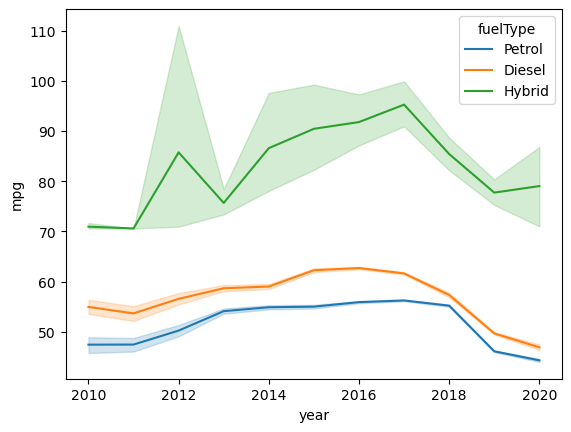

In [137]:
cars_filtered2.groupby(['fuelType', 'year'])['mpg'].mean()
                                                                                
sns.lineplot(x = 'year', y = 'mpg', data = cars_filtered2, hue = 'fuelType')

In [139]:
cars_filtered2.groupby('fuelType',)['price'].mean()

fuelType
Diesel    19005.872168
Hybrid    19102.050760
Petrol    14870.546865
Name: price, dtype: float64

In [140]:
cars_filtered2.groupby('fuelType',)['mpg'].mean()


fuelType
Diesel    57.498045
Hybrid    87.082631
Petrol    52.420107
Name: mpg, dtype: float64

<AxesSubplot:xlabel='year', ylabel='Price per Gallon'>

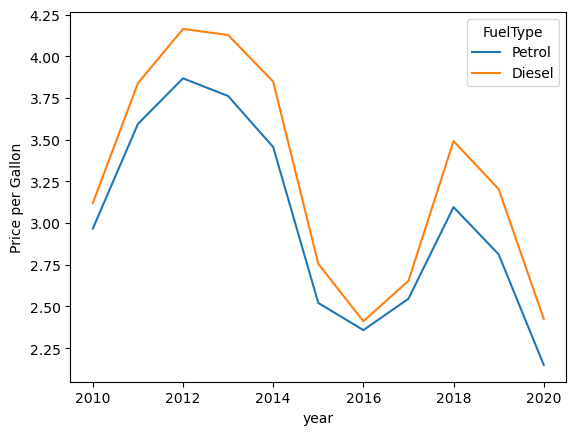

In [50]:
fuel_costs = pd.read_csv('Fuel Prices.csv')
fuel_costs.set_index('year').iloc[:, 0:2]

years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

fuel_costs_filtered = fuel_costs.loc[fuel_costs['year'].isin(years)].iloc[:, 0:3]

sns.lineplot(x = 'year', y = 'Price per Gallon', data = fuel_costs_filtered, hue = 'FuelType')



In [49]:
fuel_average = fuel_costs_filtered.groupby('FuelType')['Price per Gallon'].mean()
print(fuel_average)

FuelType
Diesel    3.276214
Petrol    3.011577
Name: Price per Gallon, dtype: float64


In [78]:
diesel_fuel_cost = 3.276214
petrol_fuel_cost = 3.011577

diesel_price = 19005.872168
petrol_price = 14870.546865
hybrid_price = 19102.050760

diesel_mpg = 57.498045
petrol_mpg = 52.420107
hybrid_mpg = 87.082631

def price_to_own(fuel_cost, car_price, mpg, miles):
    cost = ((miles/mpg)*fuel_cost) + car_price
    print(cost)
    return cost

petrol_price_50k_miles = price_to_own(petrol_fuel_cost, petrol_price, petrol_mpg, 50000)
petrol_price_100k_miles = price_to_own(petrol_fuel_cost, petrol_price, petrol_mpg, 100000)
petrol_price_150k_miles = price_to_own(petrol_fuel_cost, petrol_price, petrol_mpg, 150000)
petrol_price_200k_miles = price_to_own(petrol_fuel_cost, petrol_price, petrol_mpg, 200000)
diesel_price_50k_miles = price_to_own(diesel_fuel_cost, diesel_price, diesel_mpg, 50000)
diesel_price_100k_miles = price_to_own(diesel_fuel_cost, diesel_price, diesel_mpg, 100000)
diesel_price_150k_miles = price_to_own(diesel_fuel_cost, diesel_price, diesel_mpg, 150000)
diesel_price_200k_miles = price_to_own(diesel_fuel_cost, diesel_price, diesel_mpg, 200000)
hybrid_price_50k_miles = price_to_own(petrol_fuel_cost, hybrid_price, hybrid_mpg, 50000)
hybrid_price_100k_miles = price_to_own(petrol_fuel_cost, hybrid_price, hybrid_mpg, 100000)
hybrid_price_150k_miles = price_to_own(petrol_fuel_cost, hybrid_price, hybrid_mpg, 150000)
hybrid_price_200k_miles = price_to_own(petrol_fuel_cost, hybrid_price, hybrid_mpg, 200000)



17743.08678560718
20615.626706214363
23488.16662682155
26360.70654742873
21854.850772402988
24703.82937680597
27552.807981208956
30401.78658561194
20831.199825328535
22560.348890657075
24289.497955985615
26018.64702131415


<AxesSubplot:xlabel='Milage', ylabel='Cost'>

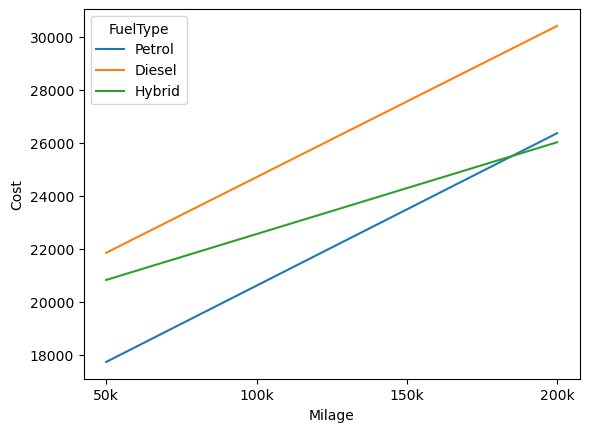

In [86]:
final_dataset = [{'FuelType' : 'Petrol', 'Milage' : '50k', 'Cost' : petrol_price_50k_miles},
                {'FuelType' : 'Petrol', 'Milage' : '100k', 'Cost' : petrol_price_100k_miles},
                {'FuelType' : 'Petrol', 'Milage' : '150k', 'Cost' : petrol_price_150k_miles},
                {'FuelType' : 'Petrol', 'Milage' : '200k', 'Cost' : petrol_price_200k_miles},
                {'FuelType' : 'Diesel', 'Milage' : '50k', 'Cost' : diesel_price_50k_miles},
                {'FuelType' : 'Diesel', 'Milage' : '100k', 'Cost' : diesel_price_100k_miles},
                {'FuelType' : 'Diesel', 'Milage' : '150k', 'Cost' : diesel_price_150k_miles},
                {'FuelType' : 'Diesel', 'Milage' : '200k', 'Cost' : diesel_price_200k_miles},
                {'FuelType' : 'Hybrid', 'Milage' : '50k', 'Cost' : hybrid_price_50k_miles},
                {'FuelType' : 'Hybrid', 'Milage' : '100k', 'Cost' : hybrid_price_100k_miles},
                {'FuelType' : 'Hybrid', 'Milage' : '150k', 'Cost' : hybrid_price_150k_miles},
                {'FuelType' : 'Hybrid', 'Milage' : '200k', 'Cost' : hybrid_price_200k_miles}]
df = pd.DataFrame(final_dataset)
sns.lineplot(x = 'Milage', y = 'Cost', data = df, hue = 'FuelType')